# 1. Standard Scaling

Standard scaling is a method of scaling the data such that the distribution of the data is centered around **0**, with a standard deviation of **1**. This is achieved by:

1. Subtracting the mean of the data from each data point.
2. Dividing the result by the standard deviation of the data.

This technique is widely used in many machine learning algorithms to ensure the data is normalized and comparable across features.

### Formula:
z = (x - μ) / σ

Where:
- \( z \): Scaled value  
- \( x \): Original data point  
- \( \mu \): Mean of the data  
- \( \sigma \): Standard deviation of the data


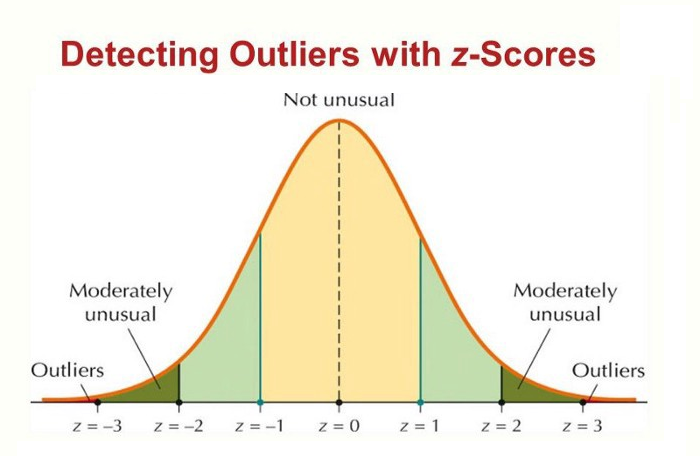

In [1]:
# import libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

In [2]:
# make an example dataset
df = {
    'age': [25,30,35,40,45],
    'height': [165,170,175,180,185],
    'weight': [55,60,65,70,75]
}

# conver this data to pandas datafram
df = pd.DataFrame(df)
df.head()

,age,height,weight
0,25,165,55
1,30,170,60
2,35,175,65
3,40,180,70
4,45,185,75


In [4]:
# import the scalar
scalar = StandardScaler()
# fit the scalar on data
scaled_df = scalar.fit_transform(df)
scaled_df

array([[-1.41421356, -1.41421356, -1.41421356],
       [-0.70710678, -0.70710678, -0.70710678],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.70710678,  0.70710678,  0.70710678],
       [ 1.41421356,  1.41421356,  1.41421356]])

In [6]:
# convert the scaled data to dataframe
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()

,age,height,weight
0,-1.414214,-1.414214,-1.414214
1,-0.707107,-0.707107,-0.707107
2,0.000000,0.000000,0.000000
3,0.707107,0.707107,0.707107
4,1.414214,1.414214,1.414214


### min-max scalar

In [7]:
# import the scalar
scalar = MinMaxScaler()

# fit the scalar on data
scaled_df = scalar.fit_transform(df)
# convert this data into a pandas dataframe
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()

,age,height,weight
0,0.00,0.00,0.00
1,0.25,0.25,0.25
2,0.50,0.50,0.50
3,0.75,0.75,0.75
4,1.00,1.00,1.00


#### Max ABS scalar

In [8]:
# import the scalar
scalar = MaxAbsScaler()

# fit the scalar on data
scaled_df = scalar.fit_transform(df)
# convert this data into a pandas dataframe
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()

,age,height,weight
0,0.555556,0.891892,0.733333
1,0.666667,0.918919,0.800000
2,0.777778,0.945946,0.866667
3,0.888889,0.972973,0.933333
4,1.000000,1.000000,1.000000


RobustScaler

In [11]:
from sklearn.preprocessing import RobustScaler
# import the scalar
scalar = RobustScaler()

# fit the scalar on data
scaled_df = scalar.fit_transform(df)
# convert this data into a pandas dataframe
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()

,age,height,weight
0,-1.0,-1.0,-1.0
1,-0.5,-0.5,-0.5
2,0.0,0.0,0.0
3,0.5,0.5,0.5
4,1.0,1.0,1.0


---
### Transformation

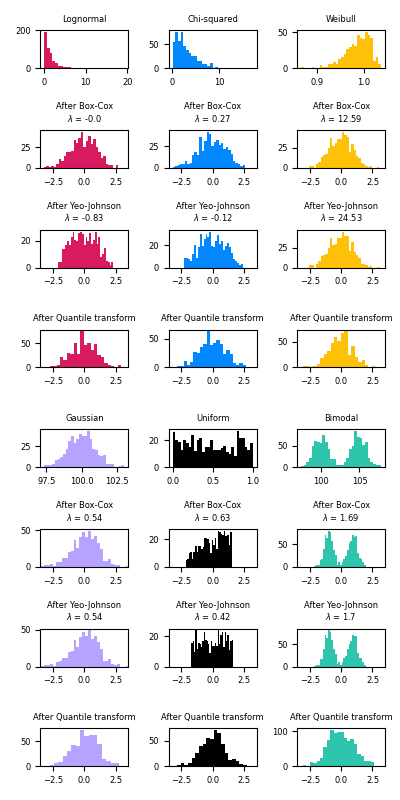

In [12]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Generate non-normal data (exponential Distribution)
np.random.seed(0)
df = np.random.exponential(scale=2, size=1000)
df = pd.DataFrame(df, columns=['values']) # convert to dataframe
df.head()

,values
0,1.591749
1,2.511862
2,1.846446
3,1.574402
4,1.102097


In [17]:
df.shape

(1000, 1)

<Axes: xlabel='values', ylabel='Count'>

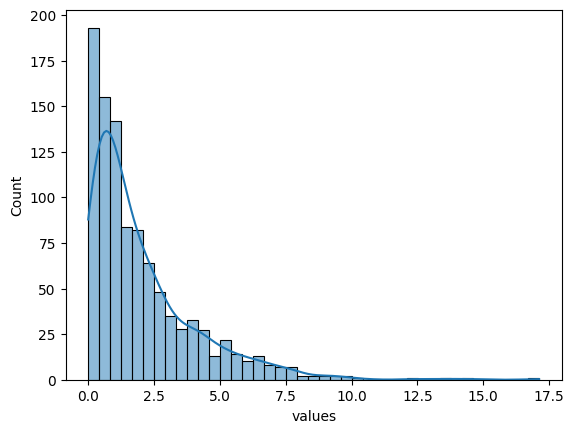

In [18]:
sns.histplot(df['values'], kde=True)

Power transformer

In [22]:
from sklearn.preprocessing import PowerTransformer
pt_boxcox = PowerTransformer(method='box-cox') # data should be positive for box-cox
pt_yeo_johnson = PowerTransformer(method='yeo-johnson') # data can be positive or negative for yeo-johnson
# BoxCox Transformation
df['boxcox'] = pt_boxcox.fit_transform(df[['values']] +1)
df['yeo_johnson'] = pt_yeo_johnson.fit_transform(df[['values']])
df.head()

,values,boxcox,yeo_johnson
0,1.591749,0.179335,0.179335
1,2.511862,0.677331,0.677331
2,1.846446,0.339698,0.339698
3,1.574402,0.167607,0.167607
4,1.102097,-0.202107,-0.202107


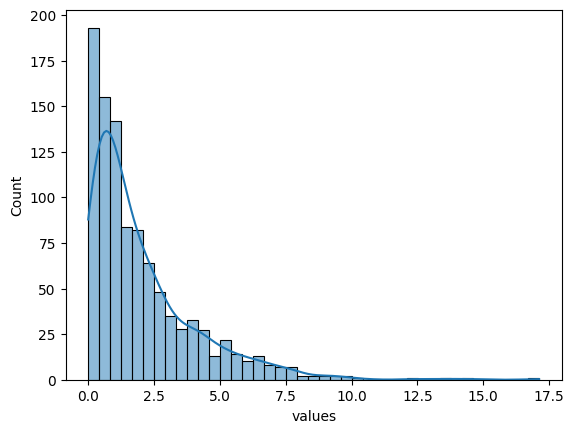

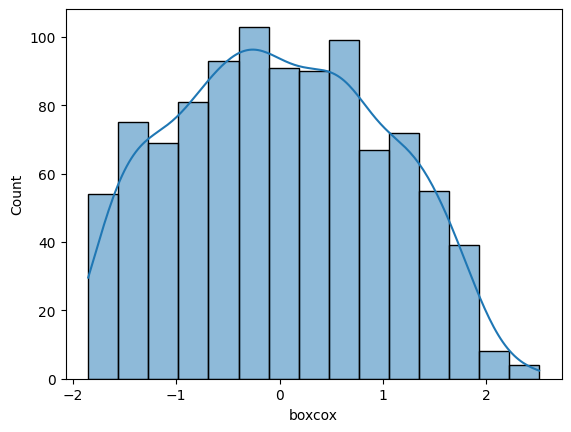

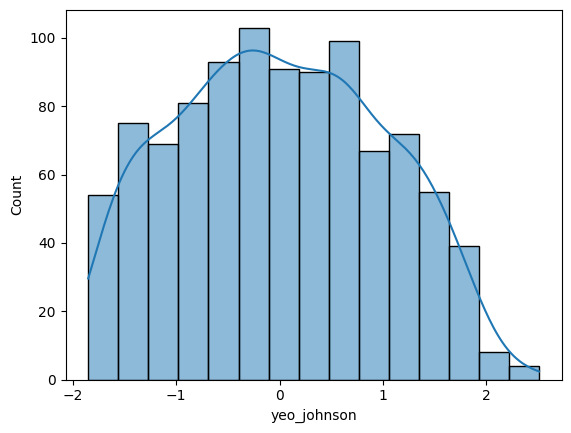

In [23]:
# create histogram of all columns using sns.hist and kde = true use a four loop
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.show()

Quantile Transformer

In [24]:
from sklearn.preprocessing import QuantileTransformer
qt_normal = QuantileTransformer(output_distribution='normal')
df['Quantile'] = qt_normal.fit_transform(df[['values']])

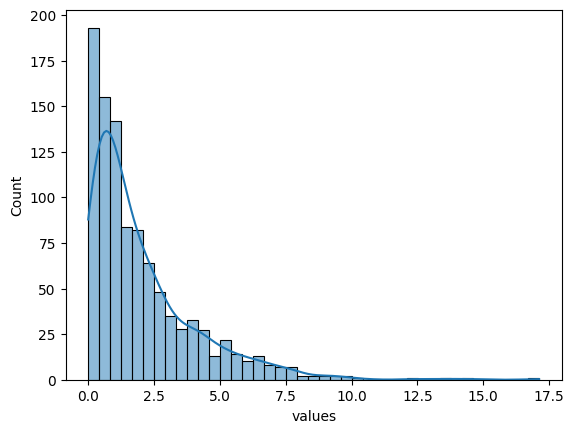

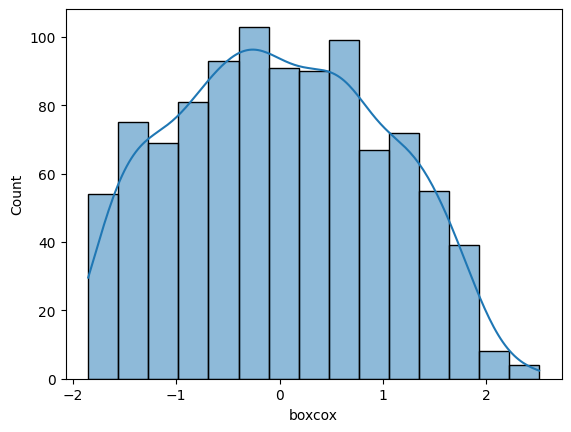

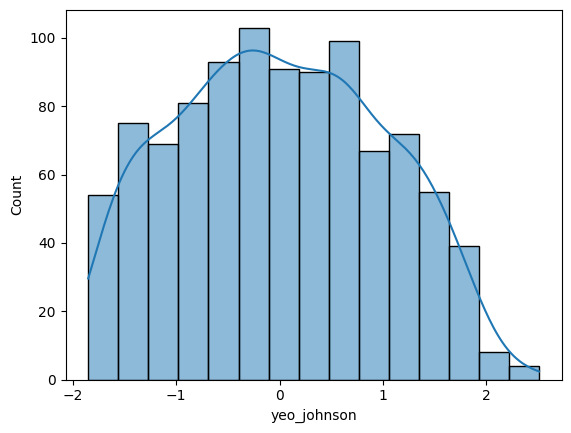

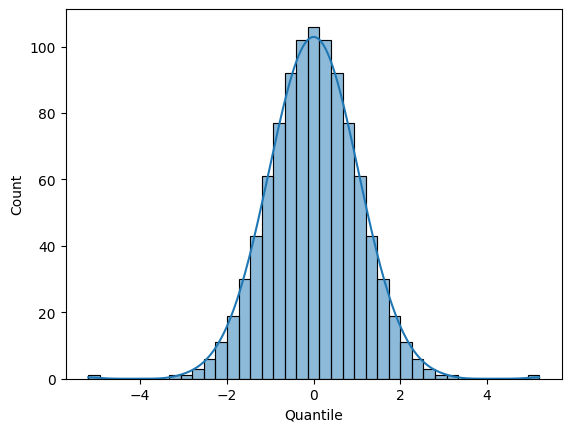

In [25]:
# create histogram of all columns using sns.hist and kde = true use a four loop
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.show()

Quantile Transformer Beautifully or Perfectly Normalize the Data

If we Standardize=False what will happen lets see all the code in cell

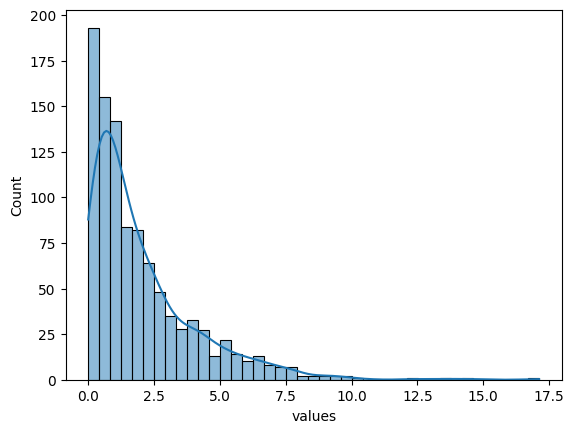

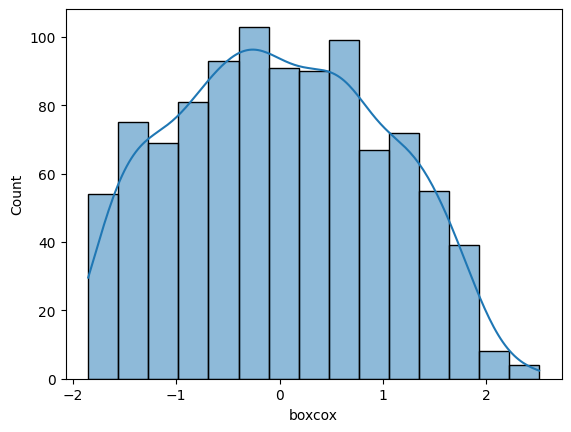

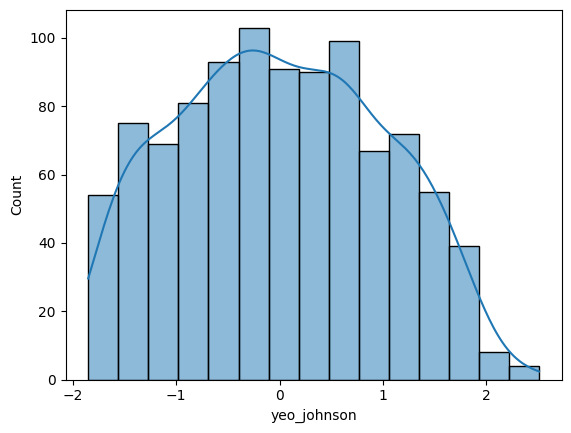

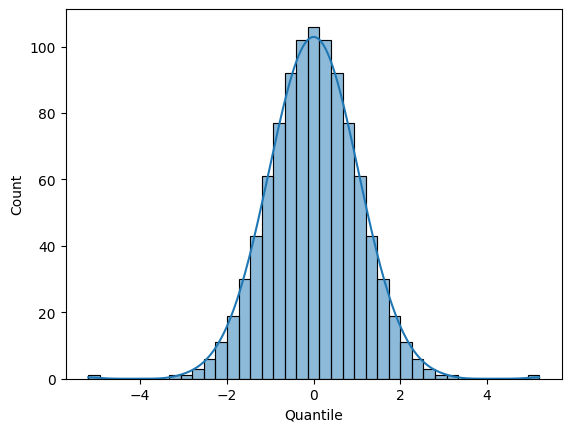

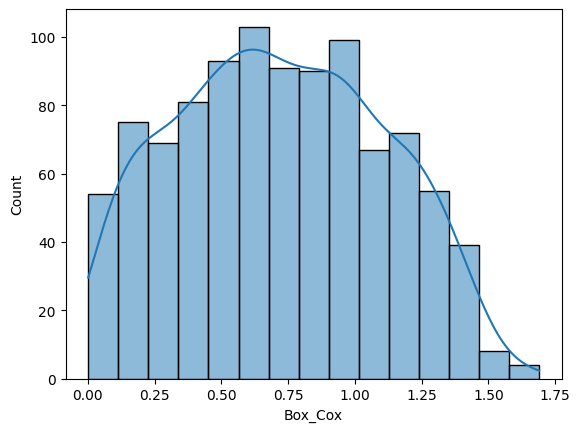

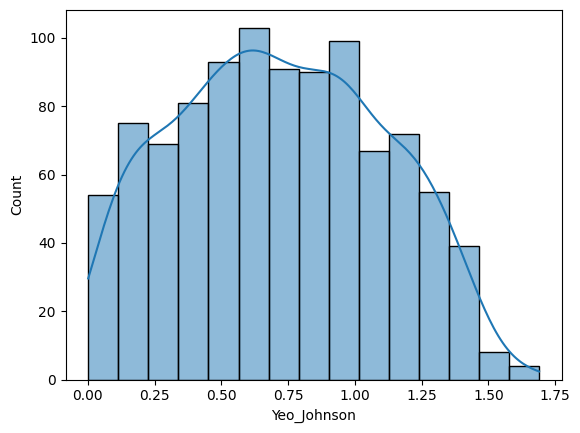

In [29]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

pt_boxcox = PowerTransformer(method='box-cox', standardize=False)
pt_yeo_johnson = PowerTransformer(method='yeo-johnson', standardize=False)
qt_normal = QuantileTransformer(output_distribution='normal')

# boxbcox k liay data must be postive
df['Box_Cox'] = pt_boxcox.fit_transform(df[['values']] + 1)
df['Yeo_Johnson'] = pt_yeo_johnson.fit_transform(df[['values']])
df['Quantile'] = qt_normal.fit_transform(df[['values']])
# creata hostograms for all columns using sns.hist and kde=true use a for loop
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.show()

---
### Normalization

# L2 Normalization:
Rescales each sample (row) to have unit norm. This type of normalization is often used when dealing with text data. The L2 norm is calculated as the square root of the sum of the squared vector values.

In [31]:
from sklearn.preprocessing import Normalizer
data = [[1, 1, 1], [1, 1, 0], [1, 0, 0]]
normalizer = Normalizer(norm='l2')
print(normalizer.fit_transform(data))

[[0.57735027 0.57735027 0.57735027]
 [0.70710678 0.70710678 0.        ]
 [1.         0.         0.        ]]


### L1 Normalization:


Also rescales each sample (row) but with a different approach, ensuring the sum of the absolute values is 1 in each row. The L1 norm is calculated as the sum of the absolute vector values. Example:

In [32]:
from sklearn.preprocessing import Normalizer
data = [[1, 1, 1], [1, 1, 0], [1, 0, 0]]
normalizer = Normalizer(norm='l1')
print(normalizer.fit_transform(data))

[[0.33333333 0.33333333 0.33333333]
 [0.5        0.5        0.        ]
 [1.         0.         0.        ]]


1. Z-Score Normalization
   1. Standard Scalar
2. Min-Max Normalization
   1. Min-Max Scalar

### Log Transformation

In [33]:
import pandas as pd
import numpy as np

# example dataset with skewed values
df = { "Values": [1,5,10,20,50,100,200,500,1000,2000,5000,10000,20000,50000,100000]}
df = pd.DataFrame(df)
df.head()

,Values
0,1
1,5
2,10
3,20
4,50


<Axes: xlabel='Values', ylabel='Count'>

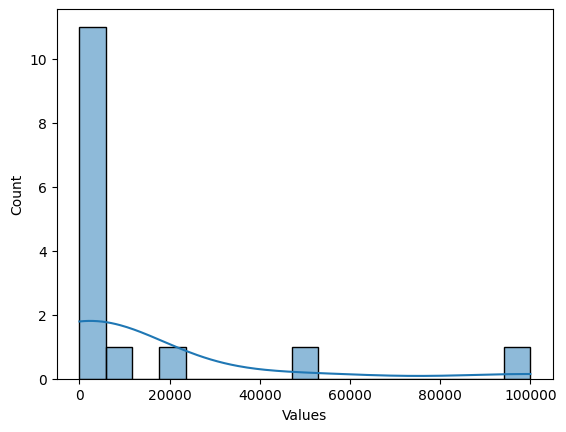

In [34]:
sns.histplot(df['Values'], kde=True)

In [37]:
# Log Transformed this Skewed Data
df['log_Values'] = np.log(df['Values'])
df

,Values,log_Values
0,1,0.000000
1,5,1.609438
2,10,2.302585
3,20,2.995732
4,50,3.912023
5,100,4.605170
6,200,5.298317
7,500,6.214608
8,1000,6.907755
9,2000,7.600902


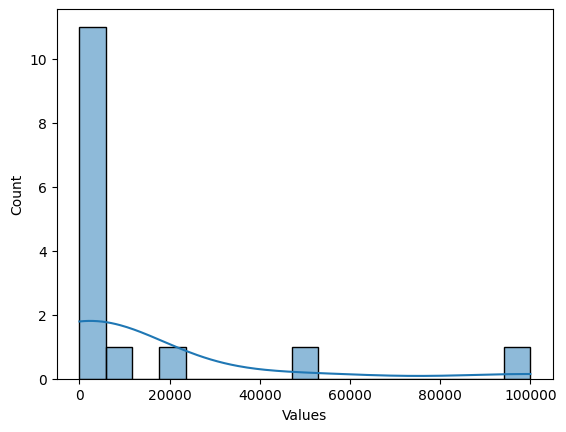

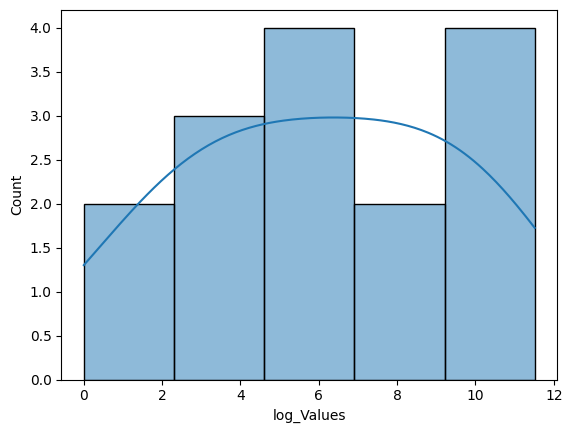

In [38]:
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.show()

Before the Transfprmation dta wasnt in pattern then after transformation it transformed into a perfect pattern